<h2><font color="#004D7F" size=6>Módulo 7. Proyecto de Machine Learning</font></h2>
<h1><font color="#004D7F" size=5>Proyecto de clasificación binaria</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Elvin Ponce Aranguri</font><br>

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del conjunto de datos](#section21)
    * [2.2. Tabla de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariados](#section31)
    * [3.2. Gráficos multivariados](#section32)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de SVC](#section51)
    * [5.2. Optimización de Gradient Boosting Classifier](#section52)
* [ 6. Fase de forecasting](#section7)


<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Para el proyecto final se utilizará el dataset **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** del repositorio **UCI machine learning**, el cual tiene datasets separados para vino rojo y blanco. 
Normalmente, los vinos son clasificados de acuerdo al rating especificado en los atributos. Ahora, combinaremos los dos datasets para formar un problema de clasificación binaria (si el vino es rojo o blanco).

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

El primer paso es importar el conjunto de herramientas a utilizar. Dentro de este conjunto se encuentra elementos desde paquetes, funciones, etc; así como establecer distintas propiedades del material a utilizar. 

In [1]:
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

<a id="section121"></a>
### <font color="#004D7F"> 1.2.1. Procesar dataset de vino rojo</font>

En este caso importamos la base de datos directamente usando el enlace, creamos una variable dummy `is_read` que identifica si el vino es rojo ($1$) y el vino es blanco ($0$).

In [2]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_df = pd.read_csv(URL, sep=";")

# Creamos una columna adicional que identifica el color del vino rojo:
red_df["is_red"] = 1

# mantenemos el primer caso en los duplicados
red_df = red_df.drop_duplicates(keep='first')
red_df.shape

(1359, 13)

<a id="section122"></a>
### <font color="#004D7F"> 1.2.2. Procesar dataset de vino blanco</font>

Teniendo en cuenta que el dataset de vinos blancos tiene más observaciones, adiconalmente a lo realizado anteriormente, se toma una muestra aleatoria del tamaño de dataframe `red_df`:

In [3]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_df = pd.read_csv(URL, sep=";")

# Creamos una columna adicional que identifica el color del vino blanco:
white_df["is_red"] = 0

# mantenemos el primer caso en los duplicados
white_df = white_df.drop_duplicates(keep='first')

# get a sample from white_df to avoid imbalance problem
white_df = white_df.sample(n = red_df.shape[0], random_state=2)

Finalmente, concatenamos los datasets y hacemos un shuffle de la data (queremos vinos rojos y blancos aleatorios)

In [4]:
df = pd.concat([red_df, white_df])
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True, inplace=True)
df.shape

(2718, 13)

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a echar un vistazo a los datos de varias maneras diferentes:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Desglosar las instancias en cada clase.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Luego de importar los datos, se hace una primera exploración del dataset a usar. Lo primero fue chequear las dimensiones del dataset; es decir, indagar el número de instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`: 

In [5]:
df.shape

(2718, 13)

Vemos que el datasets tiene 5320 observaciones y tiene 14 variables. Los nombres de las columnas pueden ser verificados con el atributo `columns`:

In [6]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'is_red']

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Tabla de datos</font>

Siguiendo las buenas prácticas, se da una mirada a la estructura del dataset a usar a través de la función `head`:

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
1,7.3,0.18,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.4,6,0
2,7.0,0.30,0.49,4.7,0.036,17.0,105.0,0.99160,3.26,0.68,12.4,7,0
3,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5,0
4,6.8,0.16,0.36,1.3,0.034,32.0,98.0,0.99058,3.02,0.58,11.3,6,0


Adicionalmente, se revisa el `type` de las variables:

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                    int64
dtype: object

Se observa que todos las variables (i.e., target y features) son numéricas, lo nos evitará realizar transformaciones para el modelo. En este caso, el target es la variable `is_read`.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

A continuación veamos algunos estadísticos resumen del datasets:

In [9]:
pd.set_option('precision', 2)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,2718.0,7.57,1.55e+00,4.20e+00,6.60,7.20,8.20,15.90
volatile acidity,2718.0,0.41,1.94e-01,8.50e-02,0.26,0.35,0.54,1.58
citric acid,2718.0,0.30,1.64e-01,0.00e+00,0.21,0.30,0.40,1.00
residual sugar,2718.0,4.25,4.08e+00,7.00e-01,1.80,2.40,5.20,65.80
chlorides,2718.0,0.07,4.39e-02,9.00e-03,0.04,0.06,0.08,0.61
free sulfur dioxide,2718.0,25.49,1.75e+01,1.00e+00,12.00,23.00,35.00,289.00
total sulfur dioxide,2718.0,92.72,5.99e+01,6.00e+00,38.00,90.00,136.00,440.00
density,2718.0,1.00,2.94e-03,9.87e-01,0.99,1.00,1.00,1.04
pH,2718.0,3.25,1.63e-01,2.72e+00,3.14,3.24,3.36,4.01
sulphates,2718.0,0.58,1.67e-01,2.30e-01,0.46,0.55,0.65,2.00


En base a los estadísticos presentados, se podría decir que es probable que las variables `free sulfur dioxide`, `residual sugar` y 
`fixed acidity` podrían presentar outliers. Esto se fundamenta en la diferencia existente entre el valor máximo y el valor correspondiente 
al percentil 75%. En breve, miremos la presencia de valores missing:

In [10]:
df.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
is_red                  0.0
dtype: float64

Se distingue que no hay presencia de valores missing. Ahora veamos la distribución del target según las clases:

In [11]:
df.groupby('is_red').size()

is_red
0    1359
1    1359
dtype: int64

El target está equitativamente distribuido, ya que al importar el dataset de vino blanco (el cual es más grande que el dataset rojo) se realizó una muestra aleatoria del tamaño de los vinos rojos. Esta estraegia es cuestionable, ya que se reduce el número de observaciones y podría disminuir la significancia de las estimaciones; sin embargo, es muy fácil de realizar en la práctica y evita el problema de la clase imbalanceada.

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Gran parte de la información del dataset es resumida en la parte de estadísticas descriptivas; sin embargo, los mayores `insights` de los datasets se hallan a través de visualizaciones. De acuerdo a lo anterior, veamos dos tipos de gráficos de visualización de datos:
* Gráficos univariados
* Gráficos multivariados

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Por cuestiones prácticas, creamos una función para graficas con `subplots` agnóstica a si el número de variables es impar o par. La función fue tomada del siguiente [link](https://stackoverflow.com/questions/28738836/matplotlib-with-odd-number-of-subplots).

In [12]:
def generate_subplots(k, row_wise=False):
    nrow, ncol = math.ceil(k/3), 3
    figure, axes = plt.subplots(nrow, ncol, figsize=(12,12))
    
    if not isinstance(axes, np.ndarray):
        return figure, [axes]
    else:
        axes = axes.flatten(order=('C' if row_wise else 'F'))
        
        for idx, ax in enumerate(axes[k:]):
            figure.delaxes(ax)            
            idx_to_turn_on_ticks = idx + k - ncol if row_wise else idx + k - 1
            for tk in axes[idx_to_turn_on_ticks].get_xticklabels():
                tk.set_visible(True)
        axes = axes[:k]
        return figure, axes

<a id="section311"></a>
### <font color="#004D7F"> Diagramas de Densidad</font>

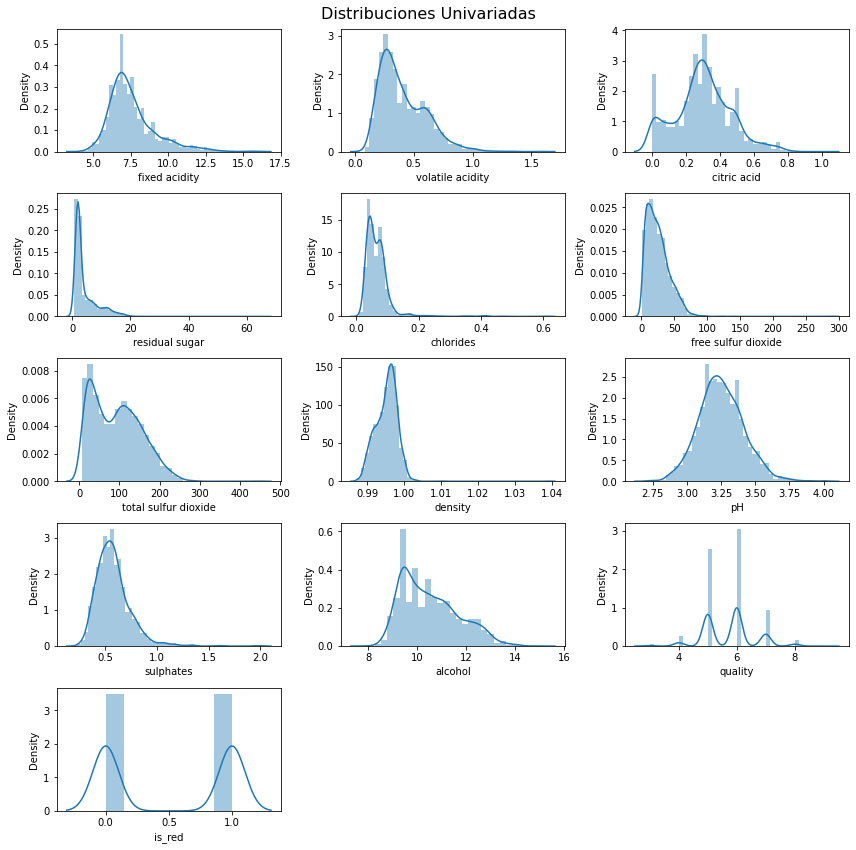

In [13]:
names= df.columns.tolist()
figure, axes = generate_subplots(len(names), row_wise=True)
for n, ax in zip(names, axes):
    sns.distplot(df[n], ax = ax)
figure.suptitle('Distribuciones Univariadas', fontsize=16)
plt.tight_layout()
plt.show()

De todas las variables del dataset, solo `pH` aparenta seguir la distribución normal. Todas las demás aparentan sesgos a la derecha 
(`volatility acidity`, `citric acid`, etc).

<a id="section312"></a>
### <font color="#004D7F"> Boxplots</font>

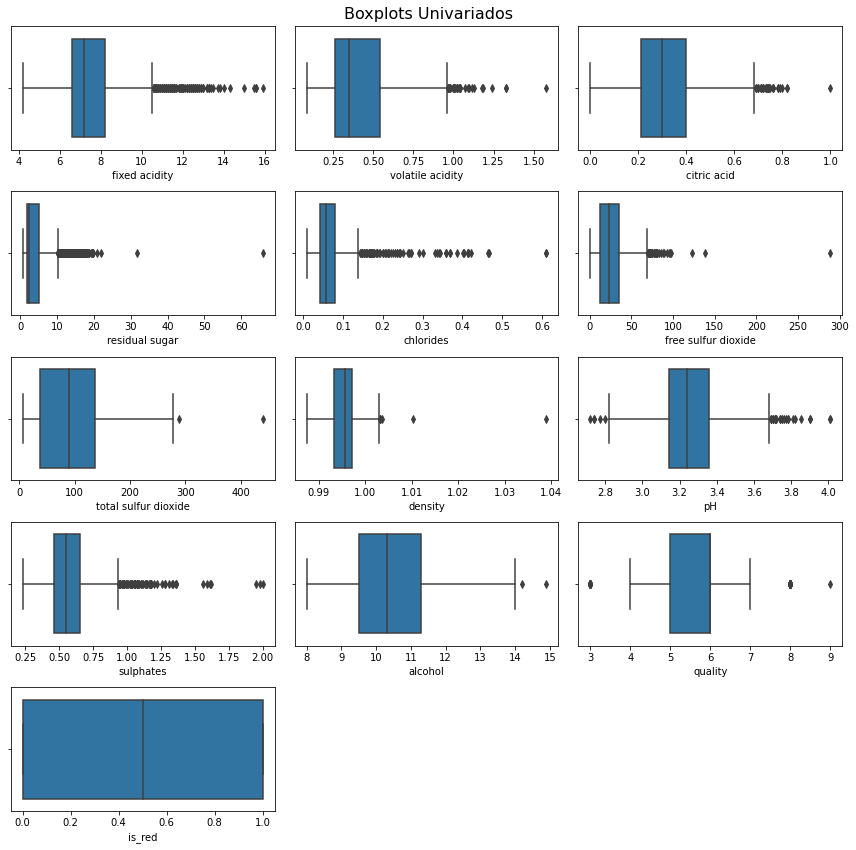

In [14]:
figure, axes = generate_subplots(len(names), row_wise=True)
for n, ax in zip(names, axes):
    sns.boxplot(df[n], ax = ax)
figure.suptitle('Boxplots Univariados', fontsize=16)
plt.tight_layout()
plt.show()

En base a los gráficos mostrados, se podría decir que es probable que las variables `free sulfur dioxide`, `residual sugar` y 
`fixed acidity`, entre otras; podrían presentar outliers. Esto se fundamenta en la diferencia existente entre el valor máximo y el valor correspondiente 
al percentil 75% (el bigote). Adicionalmente, se distingue que algunas variables como `free sulfur dioxide` y `total sulfure dioxide` tienen una escala distinta a las demás variables razón por la cual habría que aplicarles técnicas de pre-procesamiento. Esto se verifica con el gráfico de las distribuciones de las variables de nuestro dataset. Adicionalmente, vemos que el target `is_red` está distribuido equitativamente.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

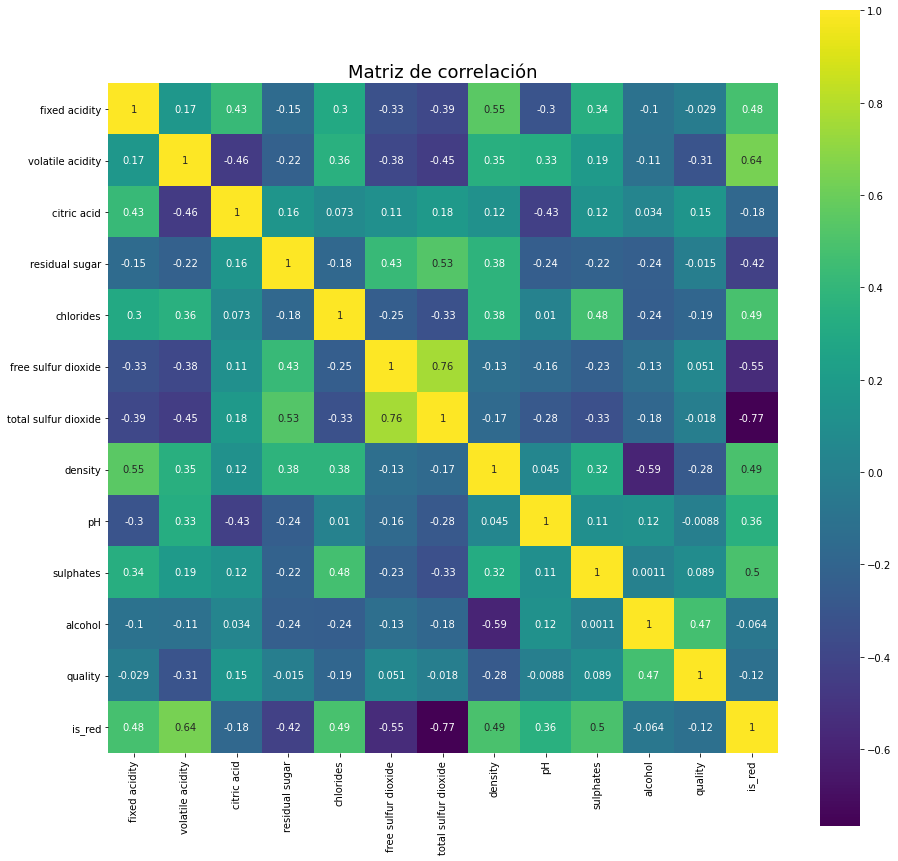

In [15]:
correlation=df.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap="viridis")
plt.title("Matriz de correlación", fontsize = 18)
plt.show()

La variable `total sulfur dioxide` es la que podría tener mayor poder predictivo para explicar el target `is_red`. Asimismo, se detecta una alta correlación entre dos features: `density` y `alcohol`. Dado que `density` tiene una mayor correlación con `is_red`, se descartaría `alcohol`.

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

En la fase de modelado se procede a estimar modelos con el objetivo de hallar aquel que mejor explique la data. Asimismo, es esencial que el modelo escogido tenga poder de pronóstico ante nueva data, es decir, poder de generalización. De acuerdo a lo anterior se procede con:
* Creación de datasets de training y validación.
* Creación de modelos base
* Evaluación de algoritmos: Estandarización y Normalización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Se conserva el 20% de las observaciones para ser utilizados en los procesos de validación; es decir evaluar el poder de generalización. Asimismo, esto nos indica que para el entrenamiento del modelo se utiliza el 80% de las observaciones.

In [16]:
train, test = train_test_split(df, test_size=.2, random_state = 1)

Luego de la creación de `train` y `test`, se procede con con la separación de las features y target para ambos conjuntos.

In [17]:
def format_output(df, problem):
    data = df.copy(deep=True)
    target = data.pop('is_red')
    target = np.array(target)     
    return (target, data)

# data para clasificación
train_Yclas, train_Xclas = format_output(train, problem = 'clas')
test_Yclas, test_Xclas   = format_output(test, 'clas')

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

Teniendo en cuenta la naturaleza de nuestro problema se escogen los siguientes modelos base:
    
    - K-Nearest Neighbors
    - Support Vector Machine
    - Decision Tree Classifier
    - Ada Boost Classifier
    - Gradient Boost Clasififfier
    
De la lista de modelos, los tres primeros modelos corresponden a modelos simples basados en instancias. Sin embargo, los dos últimos corresponden a modelos ensamblados del tipo boosting. Tiene significancia recordar que los algoritmos de boosting se basan en un proceso iterativo de ajustes de modelos en los cuales se da mayor ponderación a las observación que tuvieron un mayor error en la iteración previa, por lo cual se espera que alcancen un mayor accuracy:

In [18]:
results = []
names = []

classifiers = [
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('DTC', DecisionTreeClassifier()),
    ('RFC', RandomForestClassifier()),
    ('ABC', AdaBoostClassifier()),
    ('GBC', GradientBoostingClassifier())
    ]

kfold = KFold(n_splits=10, random_state=7)

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier[1])])
    cv_results = cross_val_score(pipe, train_Xclas, train_Yclas, cv=kfold)
    results.append(cv_results)
    names.append(classifier[0])
    print(f'Accuracy del modelo {classifier[0]}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')

Accuracy del modelo KNN: 91.12% (1.96%)
Accuracy del modelo SVC: 89.00% (2.48%)
Accuracy del modelo DTC: 97.05% (1.68%)
Accuracy del modelo RFC: 99.31% (0.42%)
Accuracy del modelo ABC: 98.94% (0.51%)
Accuracy del modelo GBC: 99.03% (0.56%)


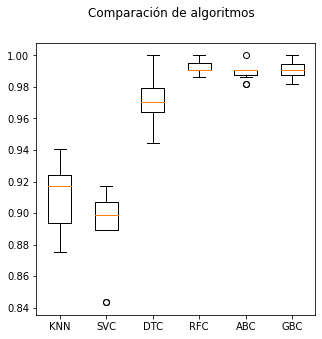

In [19]:
# Compare Algorithms
fig = plt.figure(figsize=(5,5))
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Se observa que los algoritmos de boosting tienen un mayor accuracy en comparación a los modelos simples de instancias. Una forma de mejorar el rendimiento de los modelos simples es usando técnicas de procesamiento tales como `StandardScaler` y `Normalizer`. A continuación veamos las estimaciones con ambas técnicas:

In [20]:
# Standardize the dataset
results = []
names = []

classifiers = [
    #scaled
    ('Scaled models', 'ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])),
    ('Scaled models', 'ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())])),
    ('Scaled models', 'ScaledDTC', Pipeline([('Scaler', StandardScaler()), ('DecisionTreeClassifier', DecisionTreeClassifier())])),
    ('Scaled models', 'ScaledRFC', Pipeline([('Scaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])),
    ('Scaled models', 'ScaledABC', Pipeline([('Scaler', StandardScaler()), ('AdaBoostClassifier', AdaBoostClassifier())])),
    ('Scaled models', 'ScaledGBC', Pipeline([('Scaler', StandardScaler()), ('GradientBoostingClassifier', GradientBoostingClassifier())])),
    #normalised
    ('Normalised models', 'NormKNN', Pipeline([('Scaler', Normalizer()), ('KNeighborsClassifier', KNeighborsClassifier())])),
    ('Normalised models', 'NormSVC', Pipeline([('Scaler', Normalizer()), ('SVC', SVC())])),
    ('Normalised models', 'NormDTC', Pipeline([('Scaler', Normalizer()), ('DecisionTreeClassifier', DecisionTreeClassifier())])),
    ('Normalised models', 'NormRFC', Pipeline([('Scaler', Normalizer()), ('RandomForestClassifier', RandomForestClassifier())])),
    ('Normalised models', 'NormABC', Pipeline([('Scaler', Normalizer()), ('AdaBoostClassifier', AdaBoostClassifier())])),
    ('Normalised models', 'NormGBC', Pipeline([('Scaler', Normalizer()), ('GradientBoostingClassifier', GradientBoostingClassifier())]))
     ]

kfold = KFold(n_splits=10, random_state=7)

for tipo, name, model in classifiers:
    cv_results = cross_val_score(model, train_Xclas, train_Yclas, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(f'{tipo}: Accuracy del modelo {name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')

Scaled models: Accuracy del modelo ScaledKNN: 98.80% (0.59%)
Scaled models: Accuracy del modelo ScaledSVC: 99.31% (0.47%)
Scaled models: Accuracy del modelo ScaledDTC: 96.96% (1.59%)
Scaled models: Accuracy del modelo ScaledRFC: 99.31% (0.47%)
Scaled models: Accuracy del modelo ScaledABC: 98.94% (0.51%)
Scaled models: Accuracy del modelo ScaledGBC: 99.03% (0.56%)
Normalised models: Accuracy del modelo NormKNN: 93.74% (0.97%)
Normalised models: Accuracy del modelo NormSVC: 89.88% (2.09%)
Normalised models: Accuracy del modelo NormDTC: 96.82% (1.45%)
Normalised models: Accuracy del modelo NormRFC: 98.25% (0.58%)
Normalised models: Accuracy del modelo NormABC: 97.84% (0.46%)
Normalised models: Accuracy del modelo NormGBC: 98.16% (0.74%)


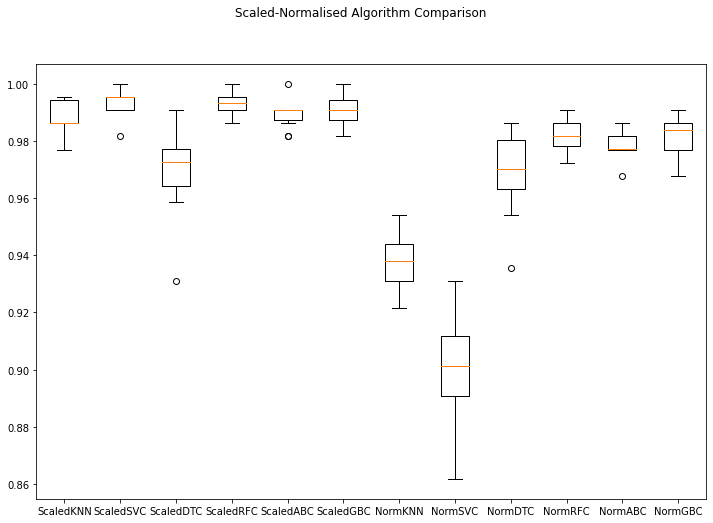

In [21]:
# Compare Algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled-Normalised Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Se observa que los modelos basados en instancias mejoraron en gran medida al utilizar el `StandardScaler`. Ahora seleccionamos de cada tipo el mejor modelo. De hecho, los dos mejores modelos son `SVC` y `GradientBoostingClassifier`, respectivamente. En la siguiente etapa se procede a optimizar dichos modelos.

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de SVC</font>

Para optimizar el algoritmo `CVS`, el valor de `C` (cuánto relajar el margen) y `gamma` (coeficiente del kernel `rbf`).  Se utiliza el método `GridSearchCV` con una validación cruzada de 10, donde los inputs fueron estandarizados previamente. Veamos los resultados de este proceso de optimización:

In [22]:
scaler = StandardScaler().fit(train_Xclas)
rescaledX = scaler.transform(train_Xclas)
param_grid = {'C':[1,10,100],'gamma':[0.1,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit = True, cv=10)
grid.fit(rescaledX, train_Yclas)
print(f" Mejor Accuracy : {grid.best_score_.mean()*100.0:,.2f}%" )
print(f" Mejor C para mejor Accuracy : {grid.best_estimator_.C}")
print(f" Mejor gamma para mejor Accuracy : {grid.best_estimator_.gamma}")

 Mejor Accuracy : 99.36%
 Mejor C para mejor Accuracy : 1
 Mejor gamma para mejor Accuracy : 0.1


En este caso vemos que los valores óptimos de los hiperparámetros son son $1$ y $0.1$ para `C` y `gamma`, respectivamente. Asimismo, se observa una ligera mejora del Accuracy.

<a id="section51"></a>
## <font color="#004D7F"> 5.2. Optimización de Gradient Boosting Classifier</font>

Para optimizar el algoritmo `GradientBoostingClassifier`, el valor de `learning_rate` (tasa que pondera la contribución de cada árbol) y `max_depth` (número límite de nodos en el árbol).  Se utiliza el método `GridSearchCV` con una validación cruzada de 3 (i.e., para disminuir el tiempo de ejecución), donde los inputs fueron estandarizados previamente. Veamos los resultados de este proceso de optimización:

In [23]:
parameters = {
    "learning_rate": [0.01, 0.1, 0.15, 0.2, 0.3, 0.4],
    "max_depth":[1,2,3]
    }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3)
clf.fit(rescaledX, train_Yclas)
print(f" Mejor Accuracy : {clf.best_score_.mean()*100.0:,.2f}%" )
print(f" Mejor learning_rate para mejor Accuracy : {clf.best_estimator_.learning_rate}")
print(f" Mejor max_depth para mejor Accuracy : {clf.best_estimator_.max_depth}")

 Mejor Accuracy : 99.40%
 Mejor learning_rate para mejor Accuracy : 0.4
 Mejor max_depth para mejor Accuracy : 3


En este caso vemos que los valores óptimos de los hiperparámetros son son $0.2$ y $2$ para `learning_rate` y `max_depth`, respectivamente. Asimismo, se observa una ligera mejora del Accuracy.

<a id="section7"></a>
# <font color="#004D7F"> 6. Fase de Forecasting</font>

Esta es la etapa final en la que nuestro modelo o modelos recibe nueva data y pone a prueba el poder de generalización ante nuevas observaciones. En nuestro caso, trabajamos con dos principales modelos para de esta manera evaluar el poder predictivo en el dataset de evaluación, y por consiguiente tener una mayor preferencia por un modelo. Dado que estuvimos trabajando con un preporcesamiento de los datos, es importante seguir usando dicha estrategia. Veamos en el siguiente bloque:

In [24]:
scaler = StandardScaler().fit(train_Xclas)
rescaledX_train = scaler.transform(train_Xclas)
rescaledX_test  = scaler.transform(test_Xclas)

classifiers = [
    ('SVC', SVC(kernel="rbf", C=1, gamma=0.1)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(learning_rate=0.2, max_depth=2))
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier[1])])
    pipe.fit(rescaledX_train, train_Yclas)   
    print(classifier[0])
    print("model score: %.3f" % pipe.score(rescaledX_test, test_Yclas))
    x = pipe.predict(rescaledX_test)
    
    print(accuracy_score(test_Yclas, x))
    print(confusion_matrix(test_Yclas, x))
    print(classification_report(test_Yclas, x))

SVC
model score: 0.993
0.9926470588235294
[[258   1]
 [  3 282]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       259
           1       1.00      0.99      0.99       285

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544

GradientBoostingClassifier
model score: 0.989
0.9889705882352942
[[256   3]
 [  3 282]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       259
           1       0.99      0.99      0.99       285

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



En la fase anterior vimos que el modelo `SVC` tenía mayor accuracy; sin embargo, en esta etapa el modelo `GradientBoostingClassifier` tiene mayor accuracy, por lo que usariamos este modelo que alcanzó un accuracy de $99.45%$. Para cerrar podríamos visualizar un gráfico de la Matriz de confusión.

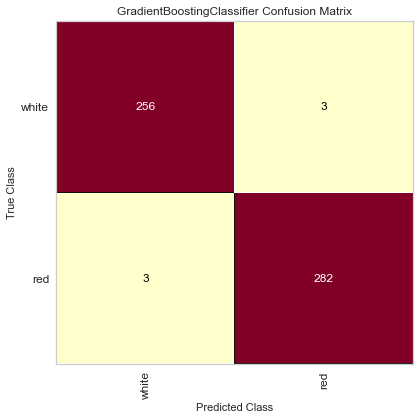

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
  ConfusionMatrix,
)
mapping = {0: "white", 1: "red"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    pipe,
    classes=["white", "red"],
    label_encoder=mapping,
    )
cm_viz.score(rescaledX_test, test_Yclas)
cm_viz.poof()

Gracias!